In [1]:
import os
# change to the root directory of the project
while os.getcwd().split('/')[-1] != 'spectral-properties-of-NN':
    os.chdir('..')
print(os.getcwd())

/home/nadezhda/Desktop/SEMESTER PROJECT/spectral-properties-of-NN


In [2]:
# arguments
import yaml
from omegaconf import OmegaConf
import torch
import numpy as np
import matplotlib.pyplot as plt
# custom imports
from src.utils.plot_utils import plot_lanczos_iterations, plot_number_correct_eigenvalues
from src.utils.general_utils import count_correctly_estimated_eigenvalues

<div class="alert alert-block alert-success">
  ❓ <strong> Question: </strong> 

   Compare the runtimes of Slow and Fast Lanczos for different Hessian batch sizes.

</div>

In [10]:
def collect_runtimes(results_dir, iteration=100):
    runtimes = {}
    for batch_dir in sorted(os.listdir(results_dir), key=lambda x: int(x.split('_')[1])):
        if batch_dir.startswith('HBS_'):
            batch_size = int(batch_dir.split('_')[1])
            if batch_size not in runtimes:
                runtimes[batch_size] = []
            batch_path = os.path.join(results_dir, batch_dir)                
            for run_dir in sorted(os.listdir(batch_path)):
                if run_dir.endswith('_run'):
                    run_path = os.path.join(batch_path, run_dir)
                    run_num = int(run_dir.split('_')[0])
                    for file in sorted(os.listdir(run_path)):
                        if file.startswith(f'eigenvalues_iter_{iteration}'):
                            iter_num = int(file.split('_')[-1].split('.')[0])
                            # skip iterations other than the specified one
                            if iter_num != iteration:
                                continue
                            # load data
                            runtime = torch.load(os.path.join(run_path, f'runtime_{iter_num}.npy'))
                            # add data to dictionary
                            runtimes[batch_size].append(runtime)

    # convert lists to numpy arrays
    runtimes = {k: np.array(v) for k, v in runtimes.items()}
    
    return runtimes

# Experiment 01: Neural Network - Layers: [784, 16, 10]
## 1. Dataset: MNIST

### 1.1. Untrained Model

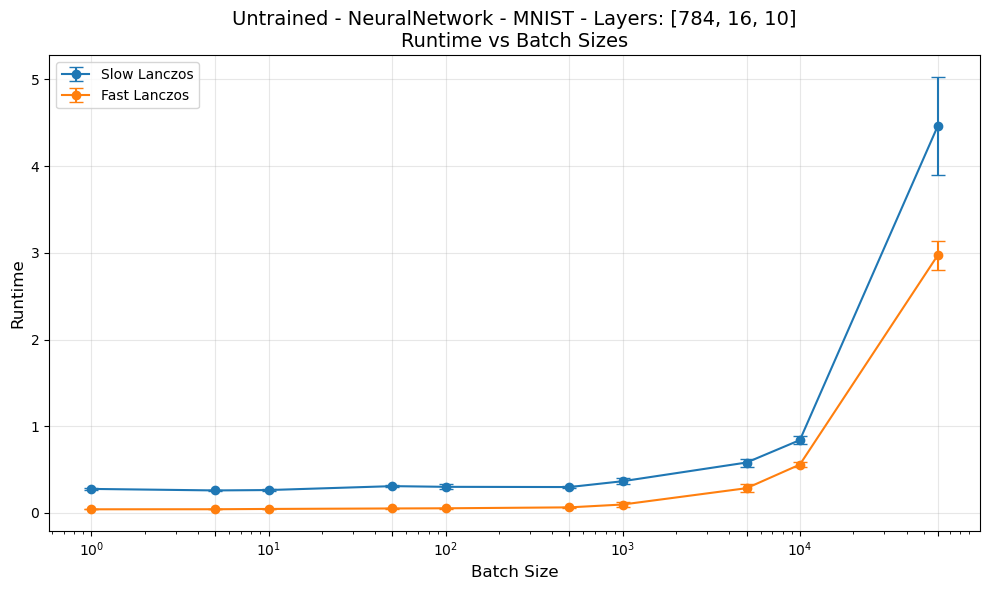

In [4]:
EXPERIMENT = "01_NN_MNIST"
MODEL = "untrained"

# get model information from config file
args = OmegaConf.create(yaml.load(open(f"experiments/{EXPERIMENT}/config.yaml"), Loader=yaml.SafeLoader))
plot_title = f"{MODEL.capitalize()} - {args.model_name} - {args.dataset} - Layers: {args.layer_sizes}"

# plot the runtimes
plt.figure(figsize=(10, 6))
for LANCZOS in ['slow', 'fast']:
    # get the results directory path
    results_dir = f"experiments/{EXPERIMENT}/results/{MODEL}/{LANCZOS}"
    # collect the runtimes
    runtimes = collect_runtimes(results_dir)
    # get the batch sizes and the mean and std of the runtimes
    batch_sizes = list(runtimes.keys())
    means = [np.mean(times) for times in runtimes.values()]
    stds = [np.std(times) for times in runtimes.values()]
    # plot the data
    plt.errorbar(batch_sizes, means, yerr=stds, fmt='o-', capsize=5, label=f'{LANCZOS.capitalize()} Lanczos')
plt.xscale('log')
plt.xlabel('Batch Size', fontsize=12)
plt.ylabel('Runtime', fontsize=12)
plt.title(f'{plot_title}\nRuntime vs Batch Sizes', fontsize=14)
plt.xticks(batch_sizes)  # Ensure x-ticks are at the batch sizes
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()

### 1.2. Trained model

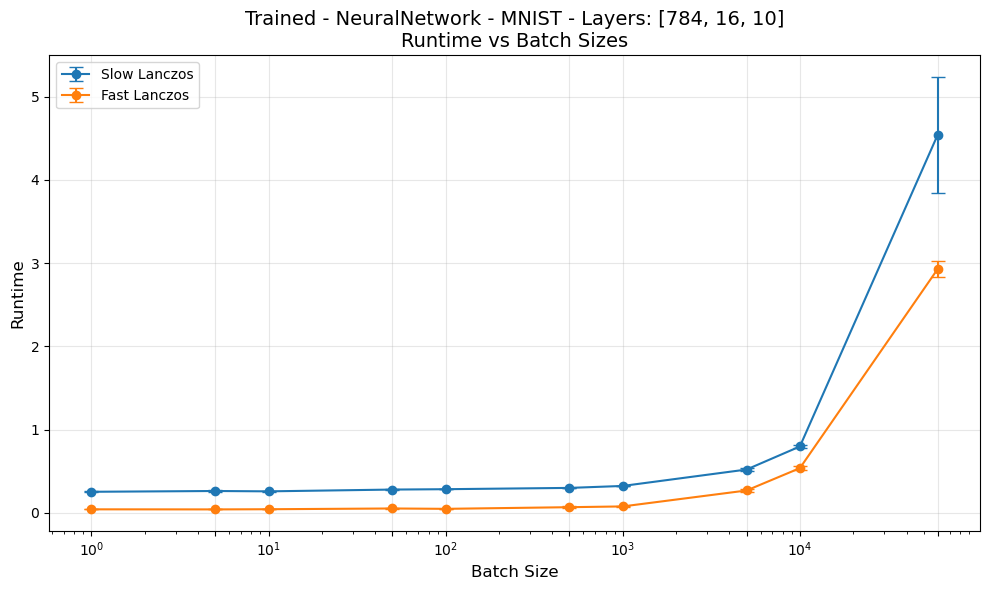

In [5]:
EXPERIMENT = "01_NN_MNIST"
MODEL = "trained"

# get model information from config file
args = OmegaConf.create(yaml.load(open(f"experiments/{EXPERIMENT}/config.yaml"), Loader=yaml.SafeLoader))
plot_title = f"{MODEL.capitalize()} - {args.model_name} - {args.dataset} - Layers: {args.layer_sizes}"

# plot the runtimes
plt.figure(figsize=(10, 6))
for LANCZOS in ['slow', 'fast']:
    # get the results directory path
    results_dir = f"experiments/{EXPERIMENT}/results/{MODEL}/{LANCZOS}"
    # collect the runtimes
    runtimes = collect_runtimes(results_dir)
    # get the batch sizes and the mean and std of the runtimes
    batch_sizes = list(runtimes.keys())
    means = [np.mean(times) for times in runtimes.values()]
    stds = [np.std(times) for times in runtimes.values()]
    # plot the data
    plt.errorbar(batch_sizes, means, yerr=stds, fmt='o-', capsize=5, label=f'{LANCZOS.capitalize()} Lanczos')
plt.xscale('log')
plt.xlabel('Batch Size', fontsize=12)
plt.ylabel('Runtime', fontsize=12)
plt.title(f'{plot_title}\nRuntime vs Batch Sizes', fontsize=14)
plt.xticks(batch_sizes)  # Ensure x-ticks are at the batch sizes
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()

## 2. Dataset: FashionMNIST

### 2.1. Untrained model

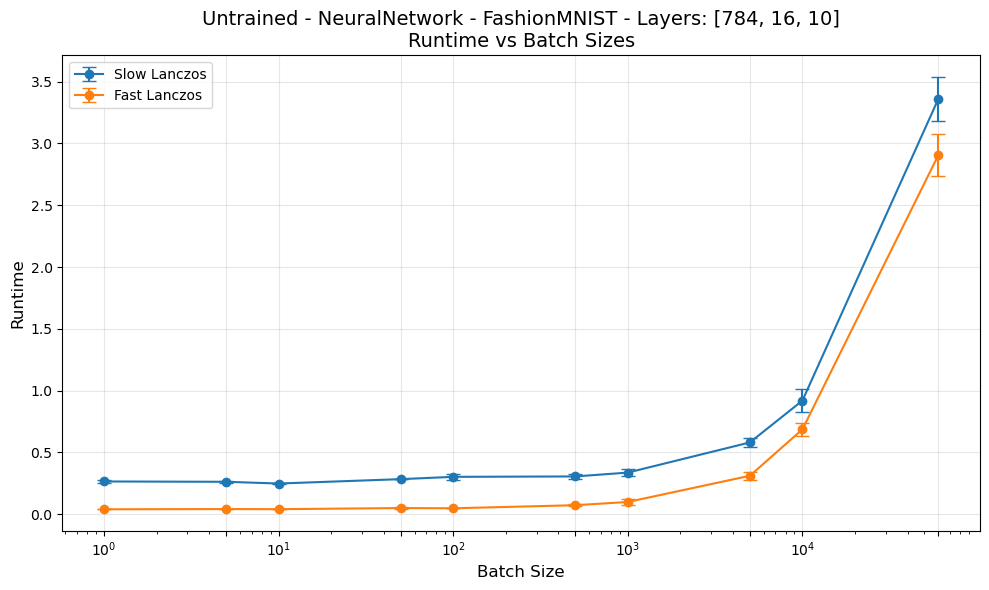

In [6]:
EXPERIMENT = "01_NN_FashionMNIST"
MODEL = "untrained"

# get model information from config file
args = OmegaConf.create(yaml.load(open(f"experiments/{EXPERIMENT}/config.yaml"), Loader=yaml.SafeLoader))
plot_title = f"{MODEL.capitalize()} - {args.model_name} - {args.dataset} - Layers: {args.layer_sizes}"

# plot the runtimes
plt.figure(figsize=(10, 6))
for LANCZOS in ['slow', 'fast']:
    # get the results directory path
    results_dir = f"experiments/{EXPERIMENT}/results/{MODEL}/{LANCZOS}"
    # collect the runtimes
    runtimes = collect_runtimes(results_dir)
    # get the batch sizes and the mean and std of the runtimes
    batch_sizes = list(runtimes.keys())
    means = [np.mean(times) for times in runtimes.values()]
    stds = [np.std(times) for times in runtimes.values()]
    # plot the data
    plt.errorbar(batch_sizes, means, yerr=stds, fmt='o-', capsize=5, label=f'{LANCZOS.capitalize()} Lanczos')
plt.xscale('log')
plt.xlabel('Batch Size', fontsize=12)
plt.ylabel('Runtime', fontsize=12)
plt.title(f'{plot_title}\nRuntime vs Batch Sizes', fontsize=14)
plt.xticks(batch_sizes)  # Ensure x-ticks are at the batch sizes
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()

### 2.2. Trained model

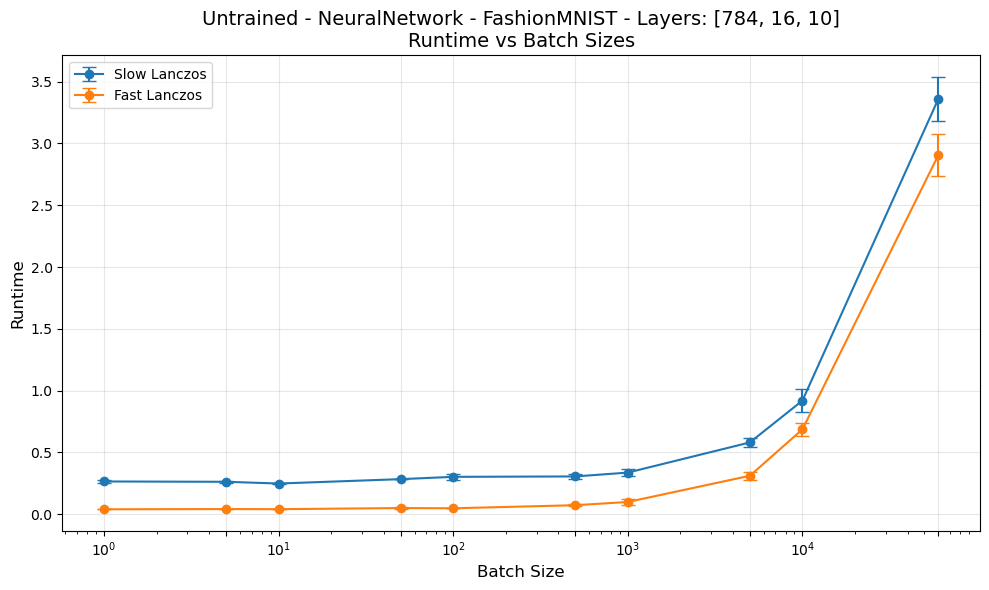

In [7]:
EXPERIMENT = "01_NN_FashionMNIST"
MODEL = "untrained"

# get model information from config file
args = OmegaConf.create(yaml.load(open(f"experiments/{EXPERIMENT}/config.yaml"), Loader=yaml.SafeLoader))
plot_title = f"{MODEL.capitalize()} - {args.model_name} - {args.dataset} - Layers: {args.layer_sizes}"

# plot the runtimes
plt.figure(figsize=(10, 6))
for LANCZOS in ['slow', 'fast']:
    # get the results directory path
    results_dir = f"experiments/{EXPERIMENT}/results/{MODEL}/{LANCZOS}"
    # collect the runtimes
    runtimes = collect_runtimes(results_dir)
    # get the batch sizes and the mean and std of the runtimes
    batch_sizes = list(runtimes.keys())
    means = [np.mean(times) for times in runtimes.values()]
    stds = [np.std(times) for times in runtimes.values()]
    # plot the data
    plt.errorbar(batch_sizes, means, yerr=stds, fmt='o-', capsize=5, label=f'{LANCZOS.capitalize()} Lanczos')
plt.xscale('log')
plt.xlabel('Batch Size', fontsize=12)
plt.ylabel('Runtime', fontsize=12)
plt.title(f'{plot_title}\nRuntime vs Batch Sizes', fontsize=14)
plt.xticks(batch_sizes)  # Ensure x-ticks are at the batch sizes
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()

## 3. Dataset: CIFAR-10

### 3.1. Untrained model

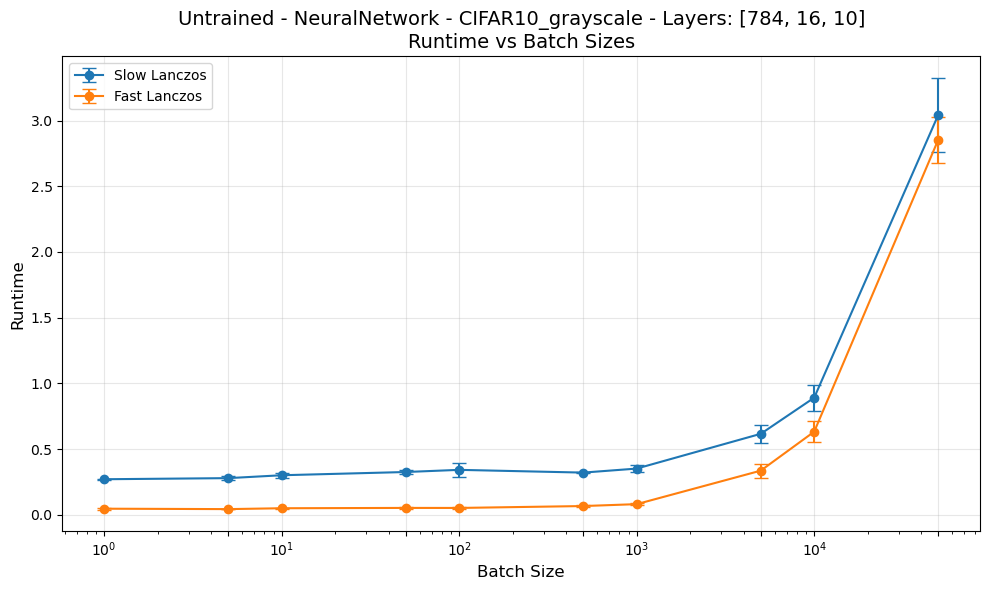

In [8]:
EXPERIMENT = "01_NN_CIFAR10"
MODEL = "untrained"

# get model information from config file
args = OmegaConf.create(yaml.load(open(f"experiments/{EXPERIMENT}/config.yaml"), Loader=yaml.SafeLoader))
plot_title = f"{MODEL.capitalize()} - {args.model_name} - {args.dataset} - Layers: {args.layer_sizes}"

# plot the runtimes
plt.figure(figsize=(10, 6))
for LANCZOS in ['slow', 'fast']:
    # get the results directory path
    results_dir = f"experiments/{EXPERIMENT}/results/{MODEL}/{LANCZOS}"
    # collect the runtimes
    runtimes = collect_runtimes(results_dir)
    # get the batch sizes and the mean and std of the runtimes
    batch_sizes = list(runtimes.keys())
    means = [np.mean(times) for times in runtimes.values()]
    stds = [np.std(times) for times in runtimes.values()]
    # plot the data
    plt.errorbar(batch_sizes, means, yerr=stds, fmt='o-', capsize=5, label=f'{LANCZOS.capitalize()} Lanczos')
plt.xscale('log')
plt.xlabel('Batch Size', fontsize=12)
plt.ylabel('Runtime', fontsize=12)
plt.title(f'{plot_title}\nRuntime vs Batch Sizes', fontsize=14)
plt.xticks(batch_sizes)  # Ensure x-ticks are at the batch sizes
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()

### 3.2. Trained model

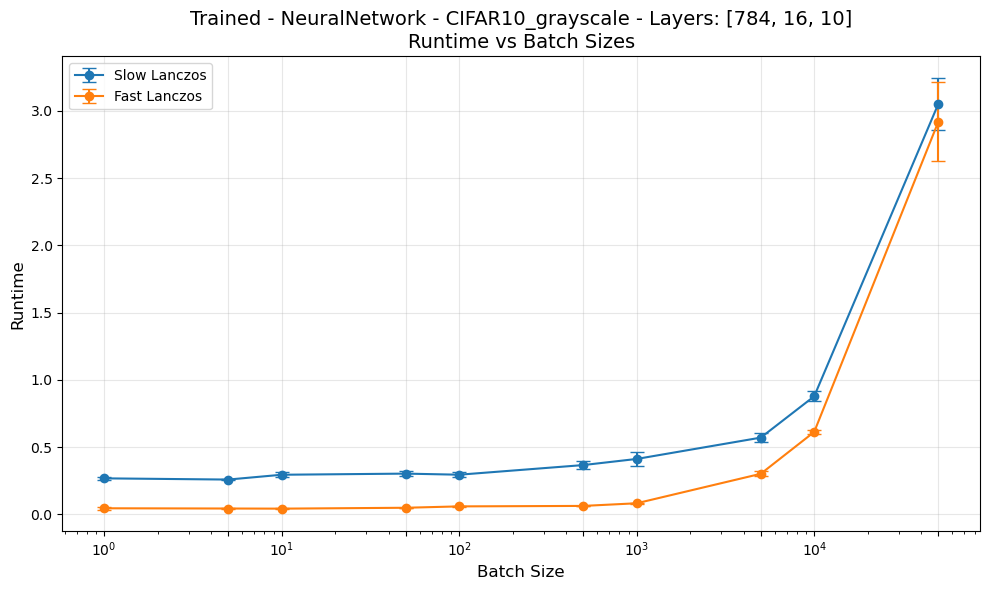

In [9]:
EXPERIMENT = "01_NN_CIFAR10"
MODEL = "trained"

# get model information from config file
args = OmegaConf.create(yaml.load(open(f"experiments/{EXPERIMENT}/config.yaml"), Loader=yaml.SafeLoader))
plot_title = f"{MODEL.capitalize()} - {args.model_name} - {args.dataset} - Layers: {args.layer_sizes}"

# plot the runtimes
plt.figure(figsize=(10, 6))
for LANCZOS in ['slow', 'fast']:
    # get the results directory path
    results_dir = f"experiments/{EXPERIMENT}/results/{MODEL}/{LANCZOS}"
    # collect the runtimes
    runtimes = collect_runtimes(results_dir)
    # get the batch sizes and the mean and std of the runtimes
    batch_sizes = list(runtimes.keys())
    means = [np.mean(times) for times in runtimes.values()]
    stds = [np.std(times) for times in runtimes.values()]
    # plot the data
    plt.errorbar(batch_sizes, means, yerr=stds, fmt='o-', capsize=5, label=f'{LANCZOS.capitalize()} Lanczos')
plt.xscale('log')
plt.xlabel('Batch Size', fontsize=12)
plt.ylabel('Runtime', fontsize=12)
plt.title(f'{plot_title}\nRuntime vs Batch Sizes', fontsize=14)
plt.xticks(batch_sizes)  # Ensure x-ticks are at the batch sizes
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()